In [2]:
import os
os.chdir('/home/maksym/advbench')
# TODO: a temporary hack. Later on rather use `pip install`.


In [19]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
marker_size, line_width = 5.0, 0.75

json_file_names = os.listdir('model_info')
clean_accs = np.zeros(len(json_file_names))
rob_accs_reported = np.zeros(len(json_file_names))
rob_accs_aa_plus = np.zeros(len(json_file_names))
additional_data = np.zeros(len(json_file_names))
years = np.zeros(len(json_file_names))
venues = np.zeros(len(json_file_names), dtype='object')
for i, json_file_name in enumerate(json_file_names):
    with open('model_info/{}'.format(json_file_name), 'r') as model_info:
        json_dict = json.load(model_info)
        clean_accs[i] = float(json_dict['clean_acc'])
        rob_accs_reported[i] = float(json_dict['reported'])
        rob_accs_aa_plus[i] = float(json_dict['AA+'])
        additional_data[i] = json_dict['additional_data']
        pos_year_beginning = json_file_name.find('20')
        years[i] = json_file_name[pos_year_beginning:pos_year_beginning+4]
        venues[i] = json_dict['venue']
additional_data = additional_data.astype('str')
additional_data[additional_data == '0.0'] = 'Models without extra data'
additional_data[additional_data == '1.0'] = 'Models with extra data'
venues[venues == ''] = 'Unpublished'



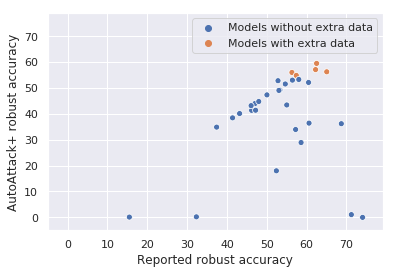

In [25]:
### AA+ robust accuracy vs reported robust accuracy
ax = sns.scatterplot(x=rob_accs_reported, y=rob_accs_aa_plus, hue=additional_data)
ax.set_xlabel('Reported robust accuracy')
ax.set_ylabel('AutoAttack+ robust accuracy')
eps_axis_lim = 5
ax.set_xlim(-eps_axis_lim, max(rob_accs_reported)+eps_axis_lim)
ax.set_ylim(-eps_axis_lim, max(rob_accs_reported)+eps_axis_lim)
plt.savefig('images/aa_robustness_vs_reported.pdf', bbox_inches='tight', pad_inches=0.0)
plt.savefig('images/aa_robustness_vs_reported.png', bbox_inches='tight', pad_inches=0.0, dpi=200)
### Conclusions: as expected: a sublinear trend



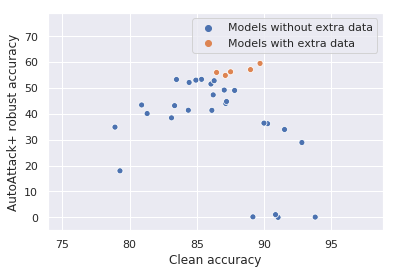

In [26]:
### AA+ robust accuracy vs clean accuracy
ax = sns.scatterplot(x=clean_accs, y=rob_accs_aa_plus, hue=additional_data)
ax.set_xlabel('Clean accuracy')
ax.set_ylabel('AutoAttack+ robust accuracy')
eps_axis_lim = 5
ax.set_xlim(-eps_axis_lim+min(clean_accs), max(clean_accs)+eps_axis_lim)
ax.set_ylim(-eps_axis_lim, max(rob_accs_reported)+eps_axis_lim)
plt.savefig('images/aa_robustness_vs_clean.pdf', bbox_inches='tight', pad_inches=0.0)
plt.savefig('images/aa_robustness_vs_clean.png', bbox_inches='tight', pad_inches=0.0, dpi=200)
### Conclusions: nice visualization of the accuracy-robustness tradeoff, extra data seems to be the game changer, but 
#                otherwise 50%+ robust accuracy and 87%+ clean accuracy seem to be not yet possible with the current 
#                methods 🤔



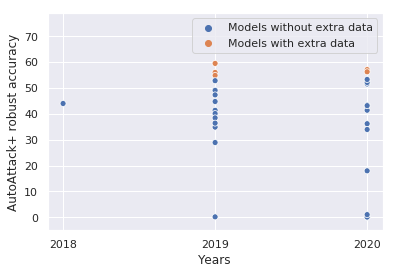

In [27]:
### AA+ robust accuracy vs years (not very exciting since most of the models are from 2019 and 2020 only)
ax = sns.scatterplot(x=years, y=rob_accs_aa_plus, hue=additional_data)
ax.set_xlabel('Years')
ax.set_ylabel('AutoAttack+ robust accuracy')
eps_axis_lim = 5
ax.set_xticks([2018, 2019, 2020])
ax.set_ylim(-eps_axis_lim, max(rob_accs_reported)+eps_axis_lim)
plt.savefig('images/aa_robustness_vs_years.pdf', bbox_inches='tight', pad_inches=0.0)
plt.savefig('images/aa_robustness_vs_years.png', bbox_inches='tight', pad_inches=0.0, dpi=200)
### Conclusion: 2020 hasn't been great so far ;)



(32,) (32,)


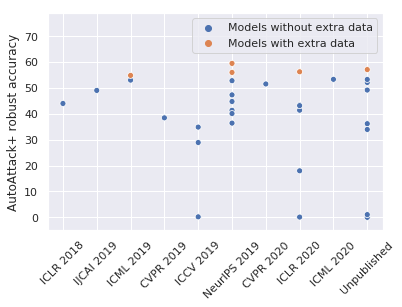

In [28]:
### AA+ robust accuracy vs venues
xticks_ordered = np.array(['ICLR 2018', 'IJCAI 2019', 'ICML 2019', 'CVPR 2019', 'ICCV 2019', 'NeurIPS 2019', 'CVPR 2020', 
                           'ICLR 2020', 'ICML 2020', 'Unpublished'])
ind = np.where(venues.reshape(venues.size, 1) == xticks_ordered)[1]
print(ind.shape, rob_accs_aa_plus.shape)

ax = sns.scatterplot(x=ind, y=rob_accs_aa_plus, hue=additional_data)
ax.set_ylabel('AutoAttack+ robust accuracy')
eps_axis_lim = 5
ax.set_xticks(range(len(xticks_ordered)))
ax.set_xticklabels(xticks_ordered)
plt.xticks(rotation=45)

ax.set_ylim(-eps_axis_lim, max(rob_accs_reported)+eps_axis_lim)
plt.savefig('images/aa_robustness_vs_venues.pdf', bbox_inches='tight', pad_inches=0.0)
plt.savefig('images/aa_robustness_vs_venues.png', bbox_inches='tight', pad_inches=0.0, dpi=200)
### Conclusions: NeurIPS 2019 was great, ICLR 2020 not much, 
#                Unpublished papers are more robust on average than ICLR 2020 papers